# SDA - Ex1

In [2]:
import math
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sig
%matplotlib inline
import ipywidgets as widgets
import pickle
from pylab import *

import sys  
sys.path.insert(0, '/Documents/NeuroScience-Master/signal_processing/ex1')

import SDA_Ex1_codeToSubmit_rewrite



## 1. Tuning curves and SNR

In [753]:
with open('q1data.pkl', 'rb') as f:
    q1data = pickle.load(f)


len(q1data)

14

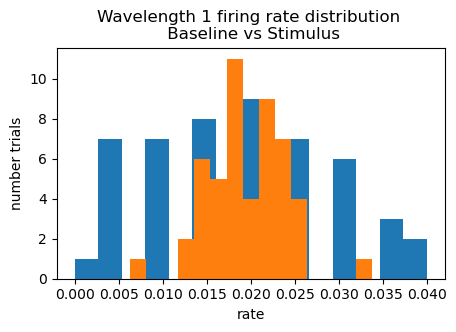

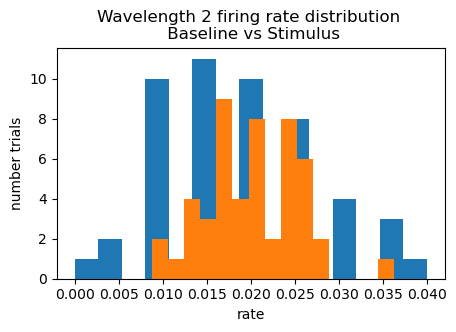

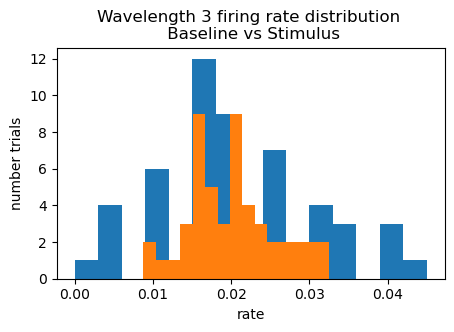

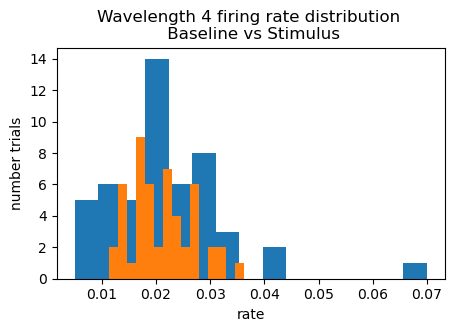

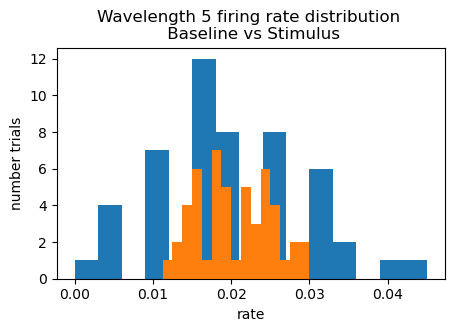

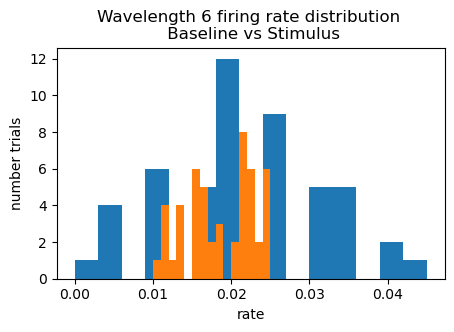

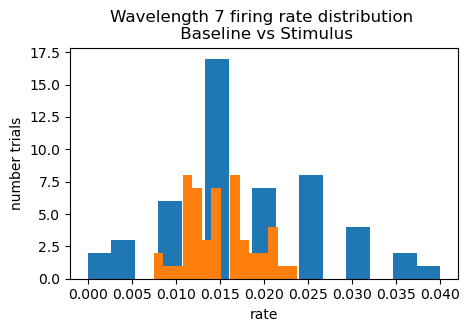

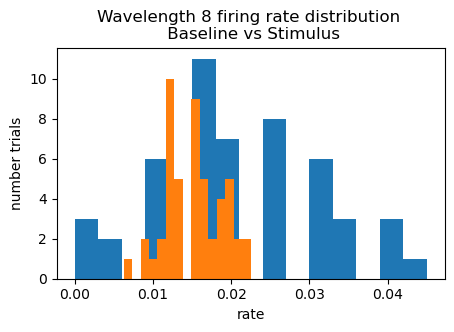

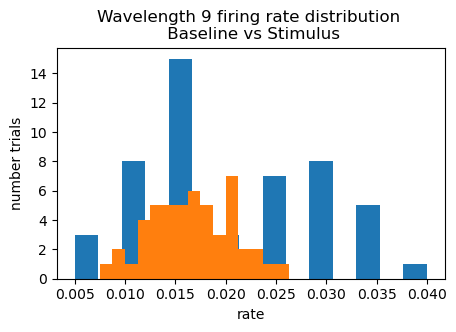

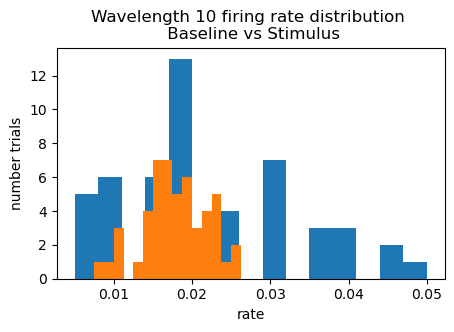

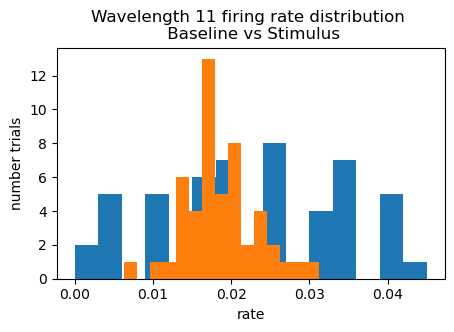

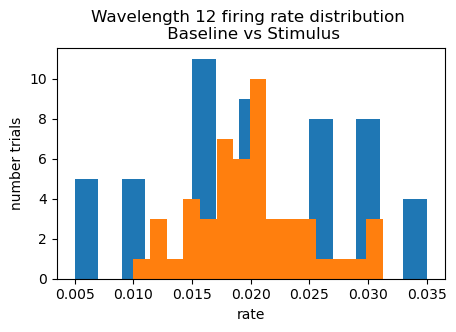

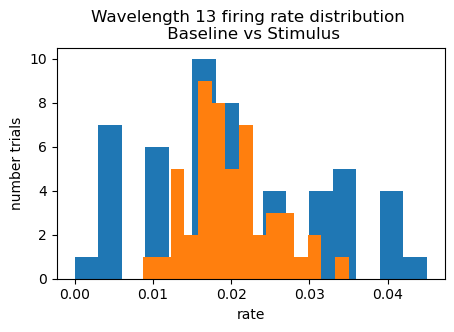

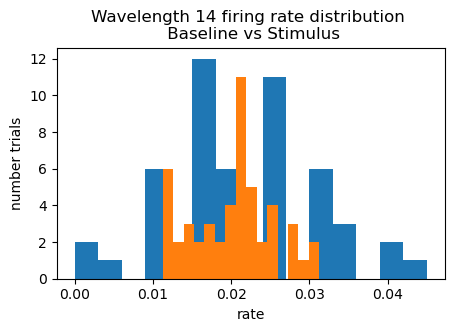

In [754]:
baseline_duration = 200
mean_rates_waves = [] # 14 values of mean rate for each wave


for wave in range(0,len(q1data)):
    fig, ax = subplots(figsize=(5,3))

    wave_rates_baseline = [] # 50 values of rates before stimulus a wave
    wave_rates_stimuli = [] # 50 values of rates during and after stimulus a wave
    for t in range(0,50):
        wave_rates_baseline.append(sum(q1data[wave][t][0:baseline_duration]) / baseline_duration)
        wave_rates_stimuli.append(sum(q1data[wave][t][baseline_duration:1000])/ (1000-baseline_duration))
    
   
    ax.hist(wave_rates_baseline,15, label='baseline')
    ax.hist(wave_rates_stimuli,15, label='during and after stimuli')
    ax.set_xlabel('rate')
    ax.set_ylabel('number trials')
    ax.set_title('Wavelength '+str(wave+1)+' firing rate distribution \n Baseline vs Stimulus')

In [755]:
baseline_duration = 200
mean_rates_waves = [] # 14 values of mean rate for each wave

best_SNR_BL = []
worst_SNR_BL = []
for wave in range(0,len(q1data)):
    
    best_snr_bsl = []
    worst_snr_bsl = []

    wave_rates_baseline = [] # 50 values of rates before stimulus a wave
    wave_rates_stimuli = [] # 50 values of rates during and after stimulus a wave
    for t in range(0,50):
        wave_rates_baseline.append(sum(q1data[wave][t][0:baseline_duration]) / baseline_duration)
        wave_rates_stimuli.append(sum(q1data[wave][t][baseline_duration:1000])/ (1000-baseline_duration))
    
    best_snr_bsl = np.argpartition(wave_rates_baseline,20)[-20:]
    worst_snr_bsl = np.argpartition(wave_rates_baseline,20)[:20]    
    print('\n For wavelength #'+str(wave+1)+" \n The 20 best SNR:\n ", best_snr_bsl,"\n The 20 worst SNR:\n",worst_snr_bsl)


    best_SNR_BL.append(best_snr_bsl.tolist())
    worst_SNR_BL.append(worst_snr_bsl.tolist())



 For wavelength #1 
 The 20 best SNR:
  [40 47 16  2 35 12 33 37 38 32 30 29 28 20 44 19 18 17 15  0] 
 The 20 worst SNR:
 [13 49 48 45 43 42 41 26 25  9 23 21 24 11 10 36 39 14  5 27]

 For wavelength #2 
 The 20 best SNR:
  [ 2 47  0 33 21  7 29 28 27 11 23 48 42 43 44 46 34 31 13 18] 
 The 20 worst SNR:
 [19 24 45 40 38 35 32 30 26 25 10  1 12 22 14 15 16 17 20 49]

 For wavelength #3 
 The 20 best SNR:
  [24 32 39 28 42 16 47 48 38 49 29 22 21 43 13 12 46  5  3  0] 
 The 20 worst SNR:
 [35 15 30 40 27 36 25  7  8 23 41 34 20 44 18 19 31  9 37 14]

 For wavelength #4 
 The 20 best SNR:
  [17 49 10 16  0 32 29 22 20 19 12 11 42  8 44  7  5  4  3 24] 
 The 20 worst SNR:
 [13 34 28 27 25  1  6 39 43 18 15 14 33 40 41 26 48 30  2 35]

 For wavelength #5 
 The 20 best SNR:
  [21 31 20 19 34 18 15 37 38 14 40 41 12 11 10  8  4 47 48 24] 
 The 20 worst SNR:
 [16 42  2  1 23  5  6  7 45  9 22 30 49 13 32 35 29 17 43 46]

 For wavelength #6 
 The 20 best SNR:
  [49 30 27 33 34 25  1 21 38 2

Text(0, 0.5, 'firing rate(ms)')

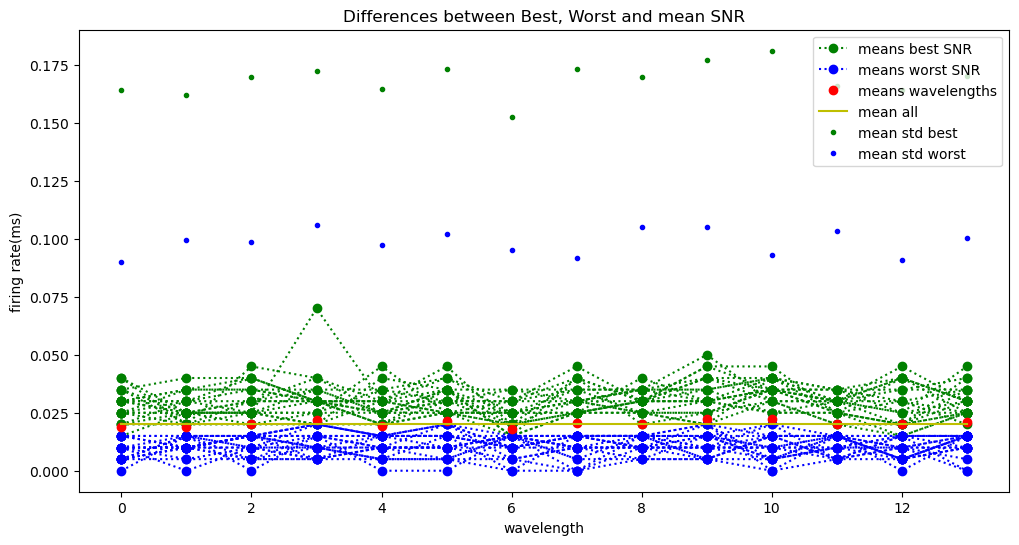

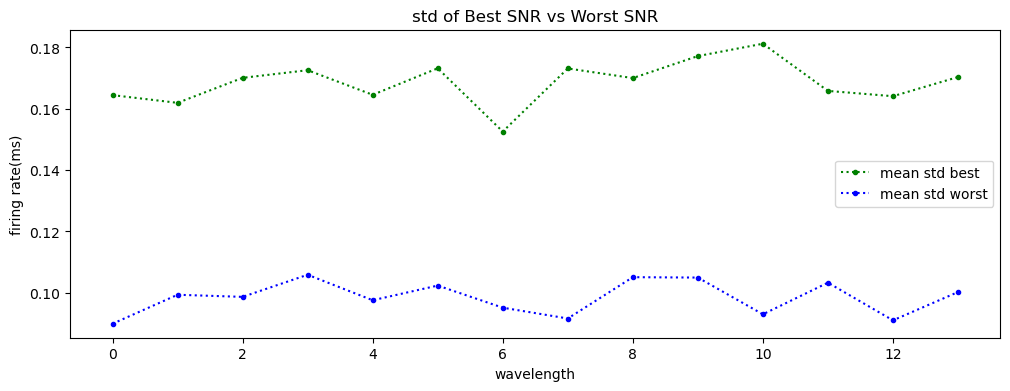

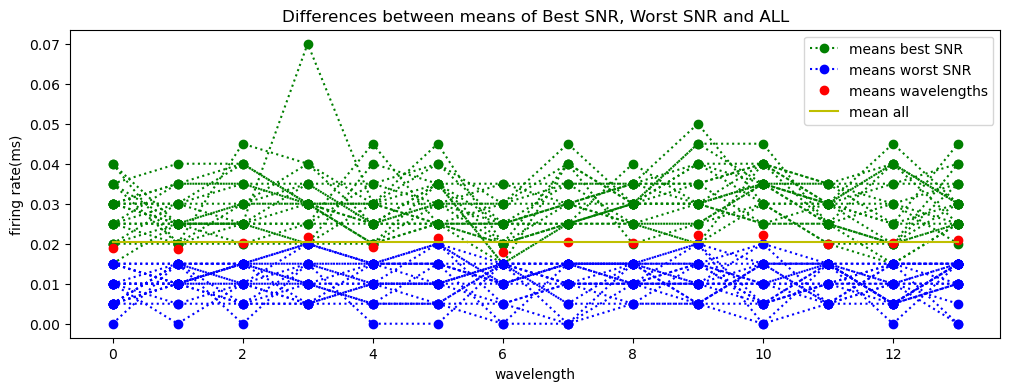

In [756]:
shape_snr = (14,20,1000)
best = np.zeros(shape_snr)
worst = np.zeros(shape_snr)


baseline_duration = 200
shape_all = (14,50)
mean_rates_waves_bsl = np.zeros(shape_all)



fig, ax = subplots(figsize=(12,6))
for wave in range(0,len(q1data)):
    
    best_snr_bsl = []
    worst_snr_bsl = []
    
    wave_rates_baseline = [] # 50 values of rates before stimulus a wave
    wave_rates_stimuli = [] # 50 values of rates during and after stimulus a wave
    
    for t in range(0,50):
        wave_rates_baseline.append(sum(q1data[wave][t][0:baseline_duration]) / baseline_duration)
        wave_rates_stimuli.append(sum(q1data[wave][t][baseline_duration:1000])/ (1000-baseline_duration))
    
    best_snr_bsl = np.argpartition(wave_rates_baseline,20)[-20:]
    worst_snr_bsl = np.argpartition(wave_rates_baseline,20)[:20]    
    mean_rates_waves_bsl[wave] = wave_rates_baseline
    
    for i in range(0,20):
        best[wave][i] = q1data[wave][best_snr_bsl[i]][:]
        worst[wave][i] = q1data[wave][worst_snr_bsl[i]][:]
        

        
shape_rm = (14,20)        
best_rates_means = np.zeros(shape_rm)
worst_rates_means = np.zeros(shape_rm)
best_rates_std = np.zeros(shape_rm)
worst_rates_std = np.zeros(shape_rm)


mean_waves = []
for w in range(0,14):
    mean_waves.append(np.mean(mean_rates_waves_bsl[w]))
    for j in range(0,20):
        best_rates_means[w][j] = sum(best[w][j][0:200])/200
        worst_rates_means[w][j] = sum(worst[w][j][0:200])/200
        best_rates_std[w][j] = np.std(best[w][j][0:200])
        worst_rates_std[w][j] = np.std(worst[w][j][0:200])
        
mean_all = np.mean(mean_waves)
mean_of_mean = [np.mean(mean_all)]*14

dtb=np.mean(best_rates_std)

dot1 = ax.plot(best_rates_means, 'go:', label="means best SNR")
dot2 = ax.plot(worst_rates_means, 'bo:', label="means worst SNR")
dot3 = ax.plot(mean_waves, 'ro', label="means wavelengths")
dot4 = ax.plot(mean_of_mean, 'y-', label="mean all")
ax.legend(handles=[dot1[0],dot2[0],dot3[0],dot4[0]])
ax.set_title("Differences between Best, Worst and mean SNR")


mean_std_best = []
mean_std_worst = []

for i in range(0,14):
    mean_std_best.append(np.mean(best_rates_std[i]))
    mean_std_worst.append(np.mean(worst_rates_std[i]))
    
    
sb = ax.plot(mean_std_best, 'g.', label="mean std best")
sw = ax.plot(mean_std_worst, 'b.', label="mean std worst")

ax.legend(handles=[dot1[0],dot2[0],dot3[0],dot4[0],sb[0],sw[0]], loc="upper right")
ax.set_xlabel("wavelength")
ax.set_ylabel('firing rate(ms)')

fig,ax = subplots(figsize=(12,4))
ax.plot(mean_std_best, 'g.:', label="mean std best")
ax.plot(mean_std_worst, 'b.:', label="mean std worst")
ax.set_xlabel("wavelength")
ax.set_ylabel('firing rate(ms)')
ax.legend()
ax.set_title("std of Best SNR vs Worst SNR")

fig,ax = subplots(figsize=(12,4))
dot1 = ax.plot(best_rates_means, 'go:', label="means best SNR")
dot2 = ax.plot(worst_rates_means, 'bo:', label="means worst SNR")
dot3 = ax.plot(mean_waves, 'ro', label="means wavelengths")
dot4 = ax.plot(mean_of_mean, 'y-', label="mean all")
ax.legend(handles=[dot1[0],dot2[0],dot3[0],dot4[0]])
ax.set_title("Differences between means of Best SNR, Worst SNR and ALL")
ax.set_xlabel("wavelength")
ax.set_ylabel('firing rate(ms)')

#     ax.errorbar([i]*20,best_rates_means[i], best_rates_std[i], color='g',elinewidth=0.1, label="means best SNR")
#     ax.errorbar([i]*20,worst_rates_means[i], worst_rates_std[i], color='b',elinewidth=0.1, label="means best SNR")

(0.015796039059793286, 0.02144228135654961, 0.012395626305377525)

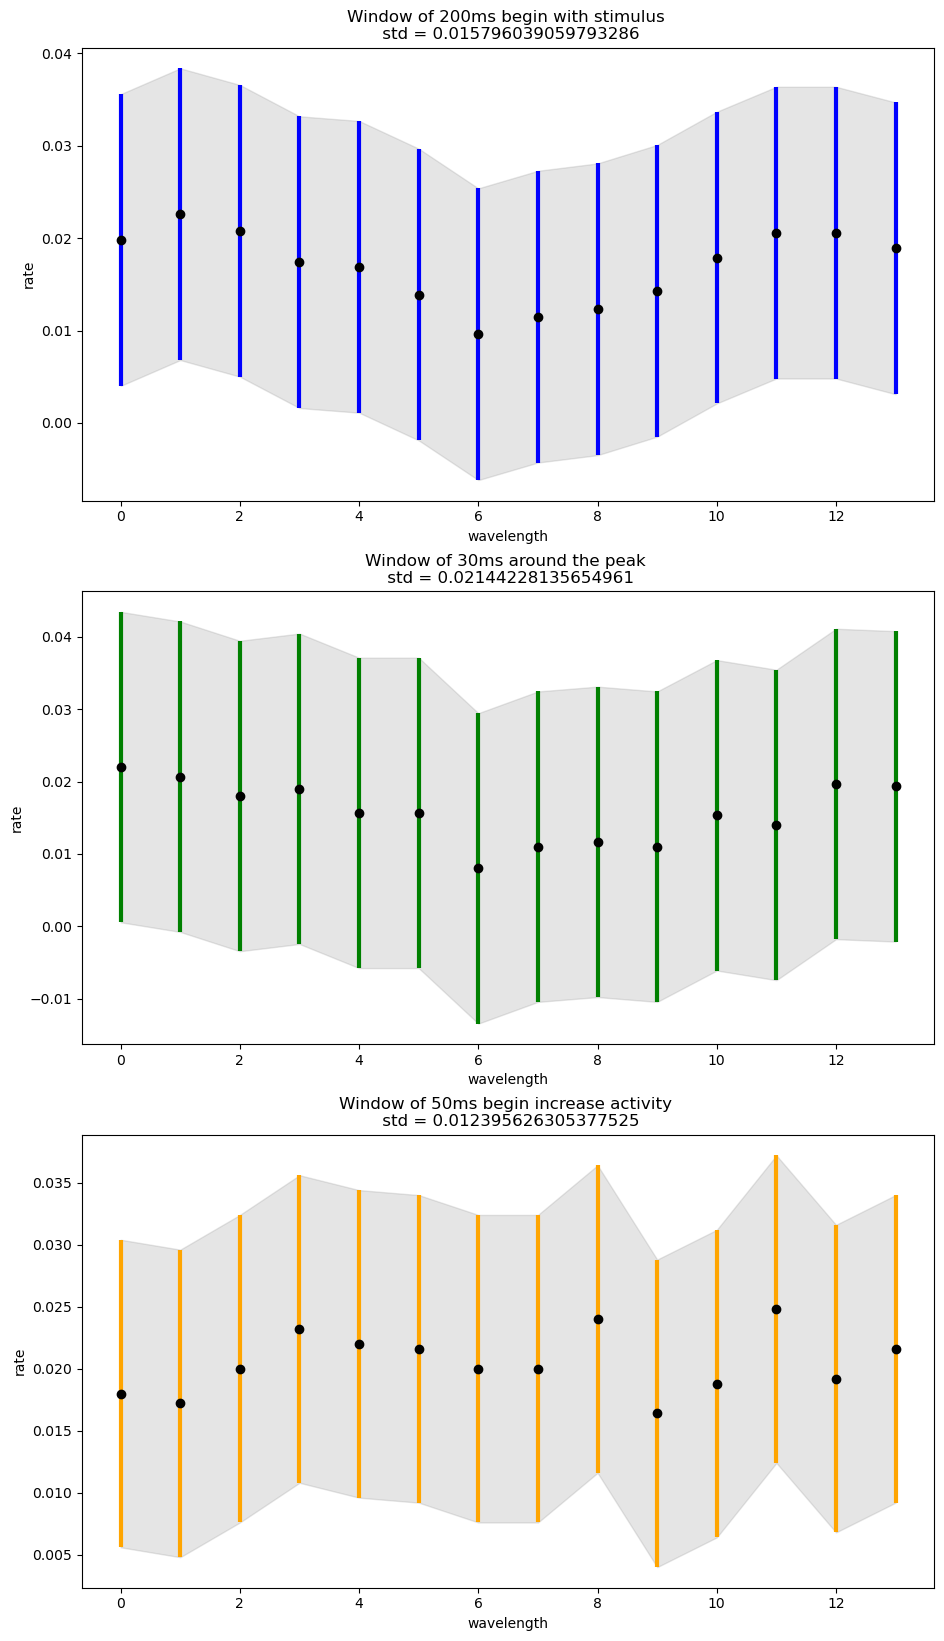

In [757]:
window1 = 200
means_window1 = [] # 14 mean value one for each wave in window1

std_win1 = []
for w in range(0,14):
    temp_trial_means = []
    tempstd = []
    for t in range(0,50):
        temp_trial_means.append(sum(q1data[w][t][200:200+window1])/window1)
        tempstd.append(np.std(q1data[w][t][200:200+window1]))
    means_window1.append(np.mean(temp_trial_means))
    std_win1.append(np.mean(tempstd))
    
window2 = 30
means_window2 = []
std_win2 = []
for w in range(0,14):
    temp_trial_means = []
    tempstd = []
    for t in range(0,50):
        temp_trial_means.append(sum(q1data[w][t][400-window2:400+window2])/(2*window2))
        tempstd.append(np.std(q1data[w][t][400-window2:400+window2]))
    means_window2.append(np.mean(temp_trial_means))
    std_win2.append(np.mean(tempstd))
    

window3 = 50
means_window3 = []
std_win3 = []
for w in range(0,14):
    temp_trial_means = []
    tempstd = []
    for t in range(0,50):
        temp_trial_means.append(sum(q1data[w][t][600:600+window3])/(window3))
        tempstd.append(np.std(q1data[w][t][600:600+window3]))
    means_window3.append(np.mean(temp_trial_means))
    std_win3.append(np.mean(tempstd))

std1 = np.std(std_win1)
std2 = np.std(std_win2)
std3 = np.std(std_win3)

    
# std1 = np.std(means_window1)
# std2 = np.std(means_window2)
# std3 = np.std(means_window3)
    
fig, ax = subplots(figsize=(11,20), nrows=3)
# ax[0].plot(means_window1, label="200ms begin with stimulus")
# ax[1].plot(means_window2, label="30ms around the peak")
# ax[2].plot(means_window3, label="50ms begin of increase actibity")
y = np.arange(0,14) 
ax[0].errorbar(y,means_window1, yerr=std1, fmt='o', color='black',
             ecolor='blue', elinewidth=3, capsize=0)
ax[1].errorbar(y,means_window2, yerr=std2, fmt='o', color='black',
             ecolor='green', elinewidth=3, capsize=0)
ax[2].errorbar(y,means_window3, yerr=std3, fmt='o', color='black',
             ecolor='orange', elinewidth=3, capsize=0)

ax[0].fill_between(y, means_window1 - std1, means_window1 + std1,
                 color='gray', alpha=0.2)
ax[0].set_title('Window of 200ms begin with stimulus \n std = '+str(std1))
ax[1].fill_between(y, means_window2 - std2, means_window2 + std2,
                 color='gray', alpha=0.2)
ax[1].set_title('Window of 30ms around the peak \n std = '+str(std2))
ax[2].fill_between(y, means_window3 - std3, means_window3 + std3,
                 color='gray', alpha=0.2)
ax[2].set_title('Window of 50ms begin increase activity \n std = '+str(std3))
ax[0].set_xlabel('wavelength')
ax[0].set_ylabel('rate')
ax[1].set_xlabel('wavelength')
ax[1].set_ylabel('rate')
ax[2].set_xlabel('wavelength')
ax[2].set_ylabel('rate')
std1, std2, std3

In [758]:
'''
Take the window begins with stimulus onset 200ms (200ms - 400ms)
prefered the large window with relative small std
input: 
    1. matrix of the spikes train (zeros and ones)
    2. the start time of the window in ms
    3. the duration of the window in ms
    4. name a string to add to the title of the plot
output: 
    1. a list of means of firing rate (one foe each wavelength)
    2. a list of std inside every wavelegth
    3. figure of the tunning curve
'''

def create_tuning_curve(spk_train, window_start_time, window_size,name=None):

    means_firing_rate_per_stimulus = [] # 14 mean value one for each wavelength
    std_firing_rate_per_stimulus = [] # 14 std value one for each wavelength
    
    for wave in np.arange(0,len(spk_train)):
        temp_trial_means = []
        temp_trial_std = []
        
        # calculate the mean and std for each trial
        for trial in np.arange(0,len(spk_train[0])):
            temp_trial_means.append(sum(spk_train[wave][trial][window_start_time:window_start_time+window_size])/window_size)
            temp_trial_std.append(np.std(spk_train[wave][trial][window_start_time:window_start_time+window_size]))
            
        means_firing_rate_per_stimulus.append(np.mean(temp_trial_means))
        std_firing_rate_per_stimulus.append(np.mean(temp_trial_std))
    
    # plotting the tunnig curve of the mean firing rate for each wavelength
    fig, ax = subplots(figsize=(14,5))
    ax.plot(means_firing_rate_per_stimulus, "*-", label="mean firing rate")
    ax.set_xlabel("stimuli(wavelength)")
    ax.set_ylabel("rate")
    ax.set_title(name+": Tuning Curve for window "+str(window_start_time)+"ms - "+str(window_start_time+window_size)+"ms")
    ax.legend()
    
    return means_firing_rate_per_stimulus,std_firing_rate_per_stimulus

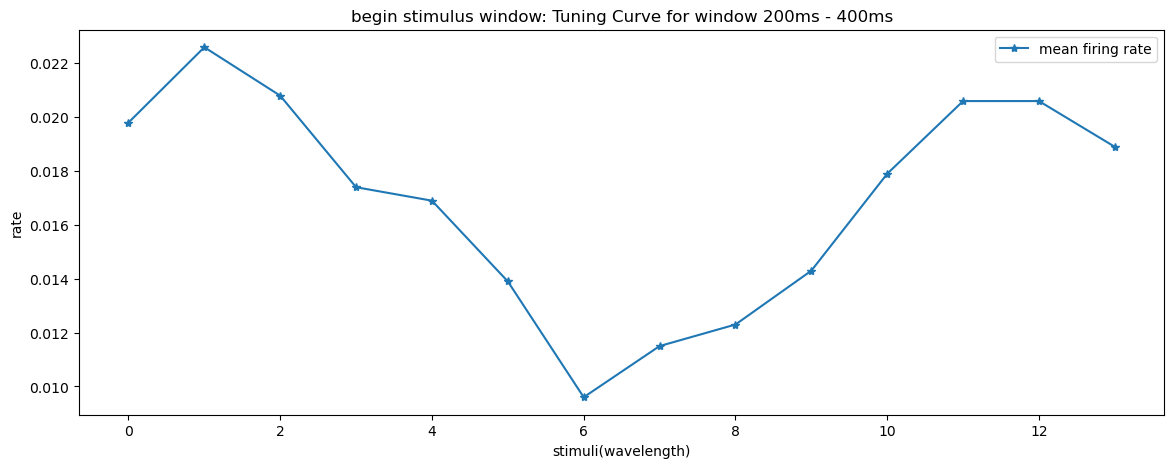

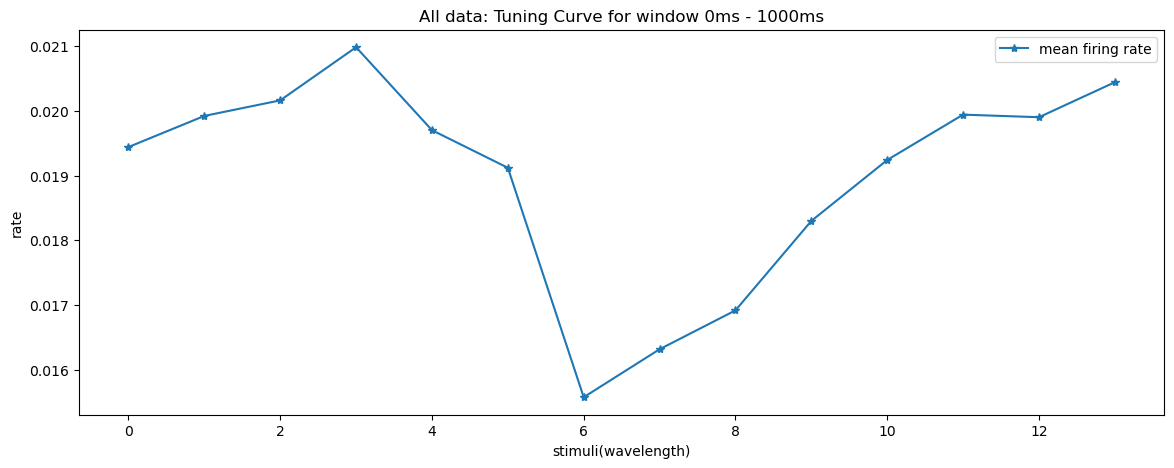

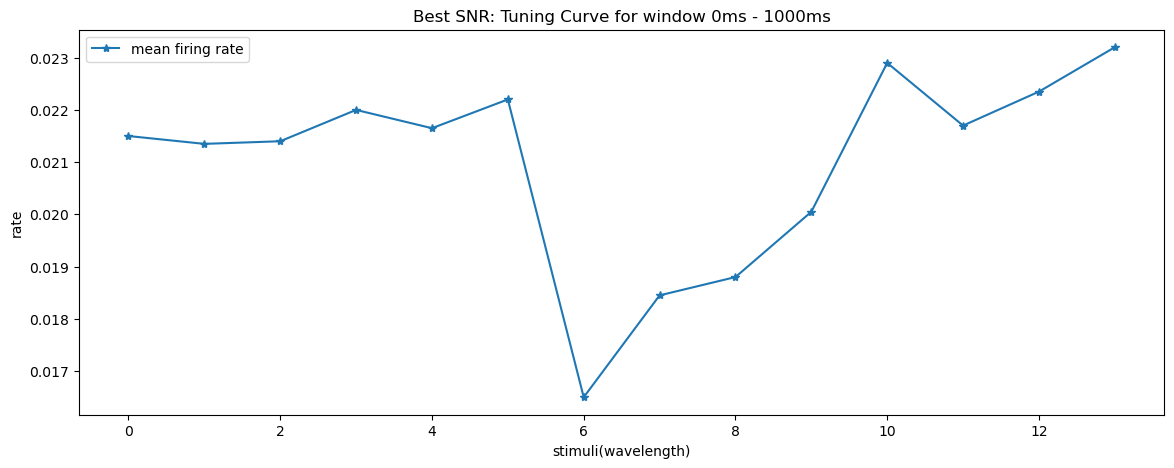

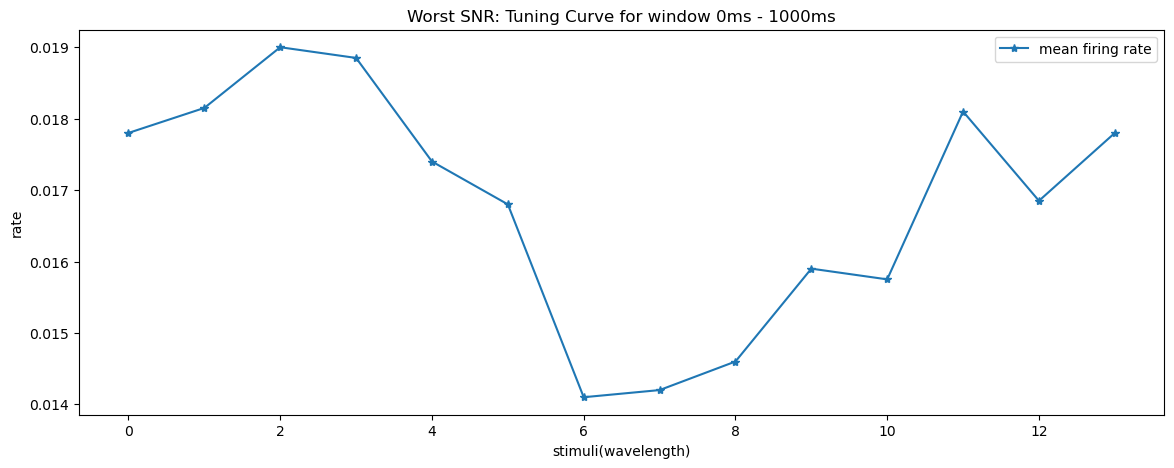

In [813]:
m,s = SDA_Ex1_codeToSubmit_rewrite.create_tuning_curve(q1data,200,200,"begin stimulus window")
m_all, s_all = create_tuning_curve(q1data,0,1000, "All data")

# best_SNR_BL.append(best_snr_bsl.tolist())
# worst_SNR_BL.append(worst_snr_bsl.tolist())
create_data_best = []
for j in range(0,14):
    temp_list = []
    for i in best_SNR_BL[j]:
        temp_list.append(q1data[j][i][:].tolist())
    create_data_best.append(temp_list)

mm,ss = create_tuning_curve(create_data_best,0,1000, "Best SNR")

create_data_worst = []
for j in range(0,14):
    temp_list = []
    for i in worst_SNR_BL[j]:
        temp_list.append(q1data[j][i][:].tolist())
    create_data_worst.append(temp_list)
    
    
mmm,sss = create_tuning_curve(create_data_worst,0,1000,"Worst SNR")


In [760]:
'''
This function caculate all the differences between all possible pairs of two follows stimuli
Than It means all the differences and get a value for the diff of the two stimuli
input: 
    1. matrix of the spikes train (zeros and ones)
    2. the start time of the window in ms
    3. the duration of the window in ms 
    4. name, a string that I added to the title
output:
    1. vector of all differences interval (it 14-1 = 13 values)
    2. ploting the vector of differences

'''

def changes_between_stimuli(spk_train,window_start_time, window_size, name=None):
    
    diffs_list = [] # list of 13 values of means of differences beetween two follow stimuli 
    for i in np.arange(1,len(spk_train)):
        means_diffs = [] # list of all 50 * 50 possible pairs differences
        
        for j in np.arange(0,len(spk_train[i])):    
            mean_temp1 = sum(spk_train[i-1][j])/len(spk_train[i][j][window_start_time:window_start_time+window_size])
            
            for k in np.arange(0,len(spk_train[i])):
                mean_temp2 = sum(spk_train[i][k])/len(spk_train[i][k][window_start_time:window_start_time+window_size])
                means_diffs.append(mean_temp1 - mean_temp2)
                
        diffs_list.append(np.mean(means_diffs))
    
    # plotting the vector of differences we got
    fig,ax = subplots(figsize=(12,4))
    ax.plot(diffs_list, "b.-")
    ax.set_title(name+': Difference between two follow stimuli')
    ax.set_xlabel('difference bin interval(1-13)')
    ax.set_ylabel('number')
    
    return diffs_list           
                
    

700000


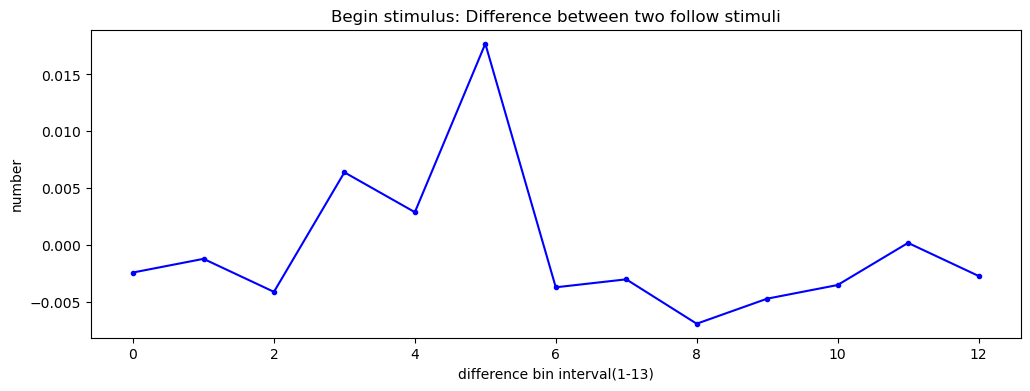

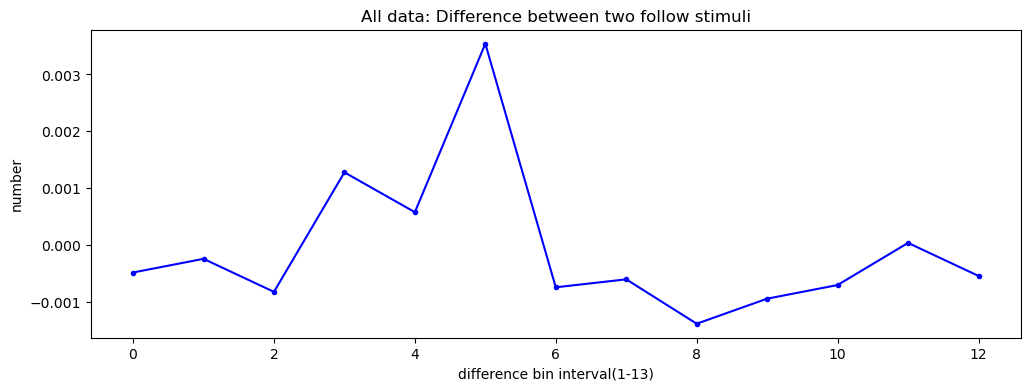

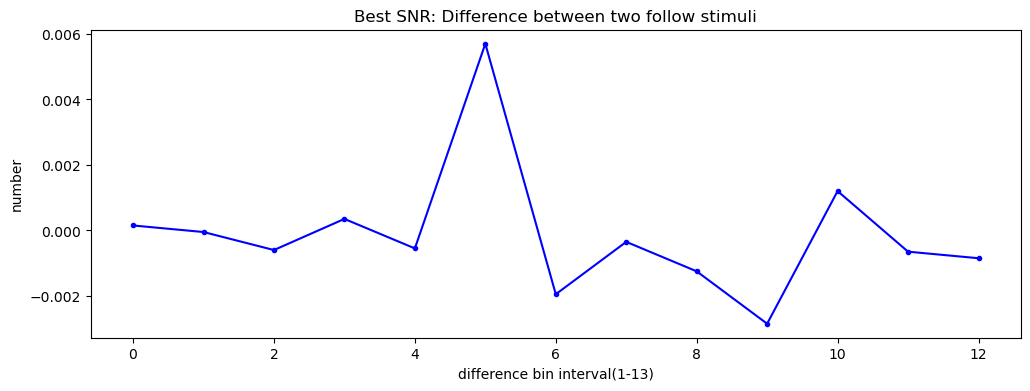

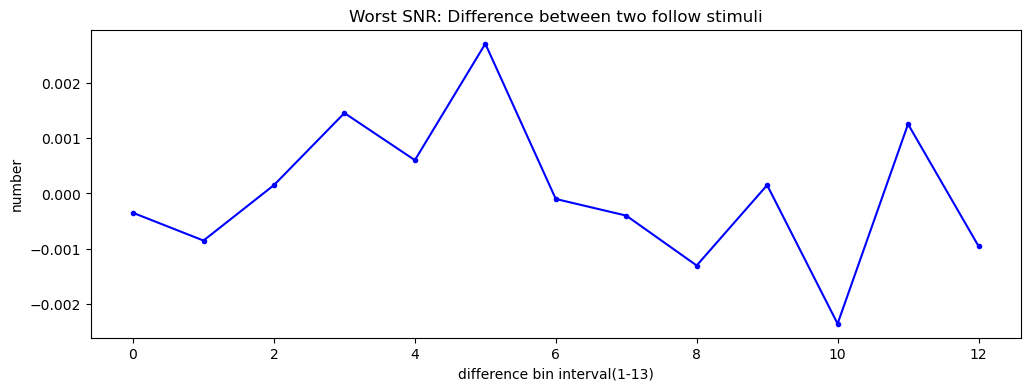

In [814]:
v = SDA_Ex1_codeToSubmit_rewrite.changes_between_stimuli(q1data,200,200, "Begin stimulus")
v = changes_between_stimuli(q1data,0,1000, "All data")
vb = changes_between_stimuli(create_data_best,0,1000, "Best SNR")
vw = changes_between_stimuli(create_data_worst,0,1000, "Worst SNR")
print(q1data.size)

## 2. Sampling and quantification

Text(0.5, 0, 'Time(seconds)')

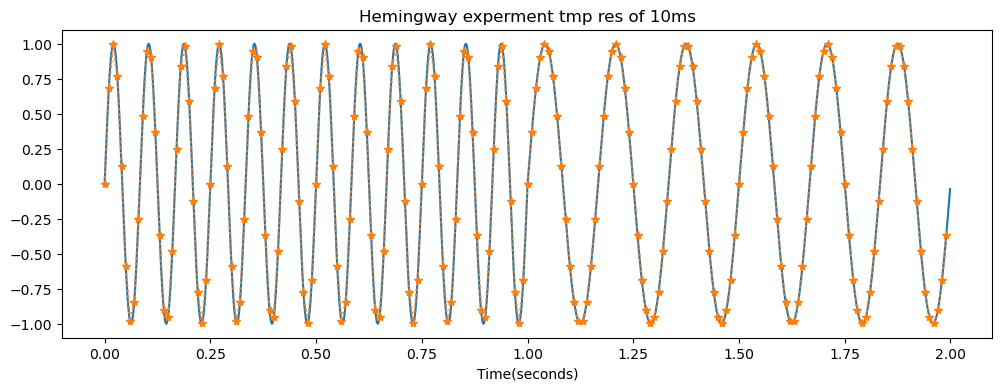

In [763]:
duration = np.arange(0,2,0.001)
s1 = np.sin(2*np.pi*12*np.arange(0,1,0.001))
s2 = np.sin(2*np.pi*6*np.arange(1,2,0.001))

s = np.concatenate((s1,s2))
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1, )
ax.plot(duration,s)

s_h = []
d_h = []
for i in range(0,len(s),10):
    s_h.append(s[i])
    d_h.append(duration[i])
ax.plot(d_h,s_h,'*:')
ax.set_title('Hemingway experment tmp res of 10ms')
ax.set_xlabel('Time(seconds)')


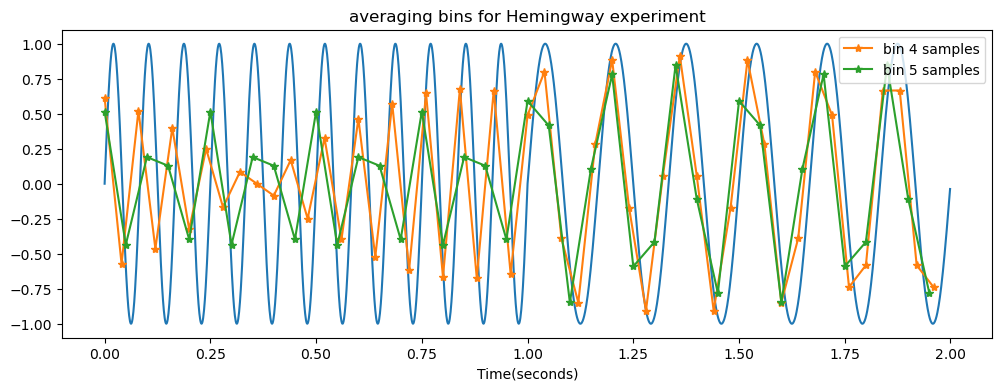

In [764]:
s_h_4_avrg = []
step = 4
for i in range(0,len(s_h),step):
    s_h_4_avrg.append(sum(s_h[i:i+step])/step)
d_h_4 = np.arange(0,2,0.04)

s_h_5_avrg = []
step = 5
for i in range(0,len(s_h),step):
    s_h_5_avrg.append(sum(s_h[i:i+step])/step)
    d_h_5 = np.arange(0,2,0.05)


fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1, )
ax.plot(duration,s)
ax.plot(d_h_4, s_h_4_avrg, '*-', label='bin 4 samples')
ax.plot(d_h_5,s_h_5_avrg, '*-', label='bin 5 samples')
ax.set_title('averaging bins for Hemingway experiment')
ax.set_xlabel('Time(seconds)')
ax.legend(loc='upper right')

Text(0.5, 0, 'Time(seconds)')

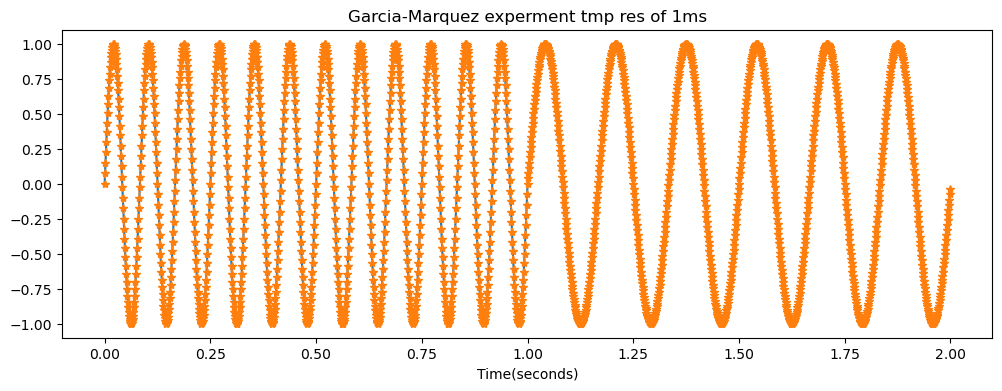

In [765]:
duration = np.arange(0,2,0.001)
s1 = np.sin(2*np.pi*12*np.arange(0,1,0.001))
s2 = np.sin(2*np.pi*6*np.arange(1,2,0.001))

s = np.concatenate((s1,s2))
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1, )
ax.plot(duration,s)
ax.plot(duration,s,'*:')

ax.set_title('Garcia-Marquez experment tmp res of 1ms')
ax.set_xlabel('Time(seconds)')

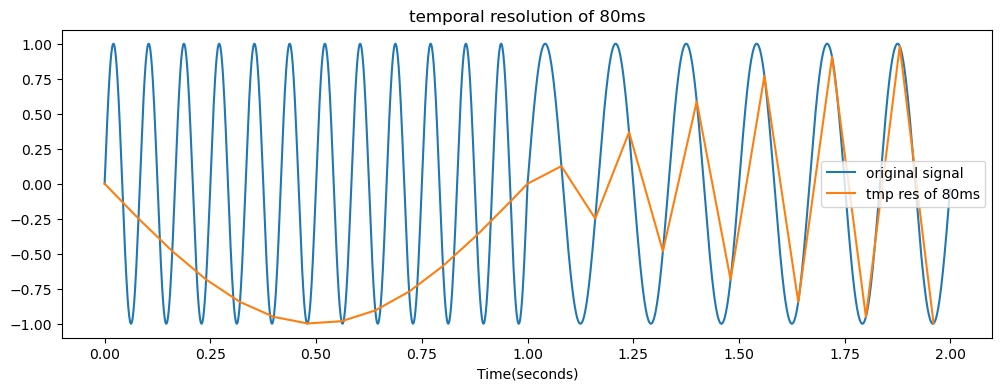

In [766]:
duration = np.arange(0,2,0.001)
s1 = np.sin(2*np.pi*12*np.arange(0,1,0.001))
s2 = np.sin(2*np.pi*6*np.arange(1,2,0.001))

false_s1 = np.sin(2*np.pi*12*np.arange(0,1,0.08))
false_s2 = np.sin(2*np.pi*6*np.arange(1,2,0.08))

s = np.concatenate((s1,s2))
false_s = np.concatenate((false_s1,false_s2))

false_d = np.concatenate((np.arange(0,1,0.08),np.arange(1,2,0.08)))
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1, )
ax.plot(duration,s, label='original signal')
ax.plot(false_d,false_s, label='tmp res of 80ms')
ax.set_title('temporal resolution of 80ms')
ax.set_xlabel('Time(seconds)')
ax.legend()

## 3. Firing rate and convolution

In [4]:
df = pd.read_csv('spk_times.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,317,318,319,320,321,322,323,324,325,326
0,0.0338,0.0626,0.1018,0.1243,0.2292,0.2336,0.2675,0.2753,0.2801,0.3017,...,9.7303,9.8103,9.8612,9.8768,9.8853,9.8869,9.8932,9.9081,9.9283,9.9351


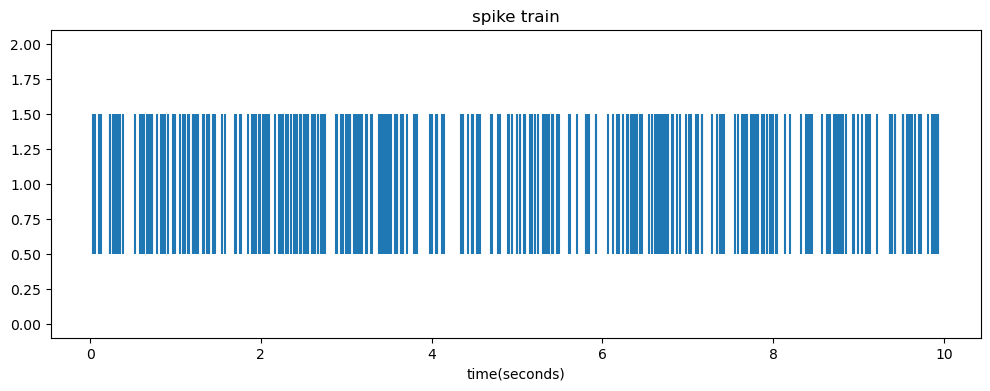

In [5]:
spk_times = np.asarray(df.values.tolist()[0])

fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
ax.eventplot(spk_times)
__ = ax.set_xlabel(f'time(seconds)')
__ = ax.set_title('spike train')

In [6]:
n =len(spk_times)
n

327

In [7]:
duration = 10 # in seconds
spk_scd = n / duration # spikes/second
spk_scd

32.7

In [8]:
rate = spk_scd / 10**3 # 1000ms in 1s
rate

0.0327

In [9]:
samples = 1000 
time_array = np.arange(0, duration, 1/samples)
spk_train = np.zeros(samples*duration)

for i in spk_times:
    spk_train[round(i*1000)] = 1

spk_train

array([0., 0., 0., ..., 0., 0., 0.])

In [10]:
def non_overlapping_window(spk_train, bin_sizes):
    
    fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
    rates_acrd_window = []
    
    for s in bin_sizes:
        rates = []
        step = int(s * 1000)
        
        for i in np.arange(0,len(spk_train),step):
            rates.append(sum(spk_train[i:i+step]) / step)
        
        rates_acrd_window.append([rates,len(rates)])
        
        ax.plot(rates, '*-', label=str(s)+"seconds")
    ax.set_xlabel('number of bins')
    ax.set_ylabel('rate')
    ax.set_title('non overlapping windows')
    ax.legend()
    
    
    

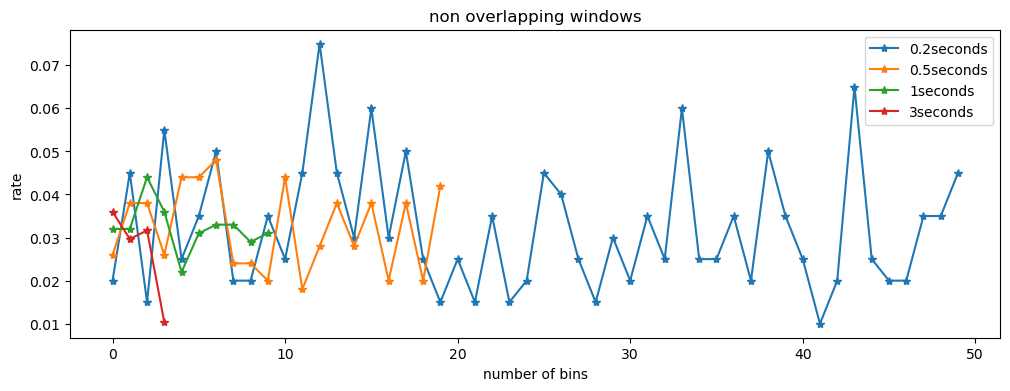

In [774]:
bin_sizes=[0.2,0.5,1,3]
non_overlapping_window(spk_train,bin_sizes)

In [11]:
# this function get an array of spike train and an array of window for the convolution
# input: vector of ones and zeros, vector of the sizes for the concolution
# output: an array of the concolution values

def MyConv(spk_train, conv_window):
    reverse_conv_window = conv_window[::-1] # reversing the convolution window
    sum_conv_window = sum(reverse_conv_window)
#     result_conv_window = [x / sum_conv_window for x in reverse_conv_window] 
    size_window = len(conv_window)
    padding = np.pad(spk_train, pad_width=size_window-1) # adding zero padding
    conv_arr = []
    
    for i in np.arange(0,len(padding)):
        if i == len(padding)-(size_window-1):
            return conv_arr
        temp_vec = padding[i:i+size_window]
        result_value = sum(np.multiply(temp_vec,reverse_conv_window)) / sum_conv_window #dividing by the window sum
        conv_arr.append(result_value)
    return conv_arr

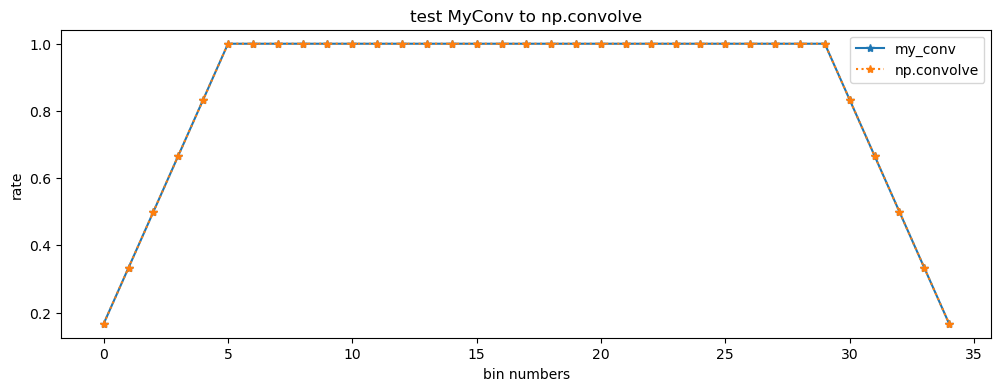

In [815]:
x = np.ones(30)
my_conv = SDA_Ex1_codeToSubmit_rewrite.MyConv(x,[1/6,1/6,1/6,1/6,1/6,1/6])
c = np.convolve(x,[1/6,1/6,1/6,1/6,1/6,1/6])
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
ax.plot(my_c,'*-', label="my_conv")
ax.plot(c,'*:', label="np.convolve")
ax.set_title('test MyConv to np.convolve')
ax.legend()
__ = ax.set_xlabel(f'bin numbers')
__ = ax.set_ylabel(f'rate')


In [786]:
# window_rec_1 = np.ones()
# window_rec_2
# window_rec_3
# window_rec_4

50
[0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02]


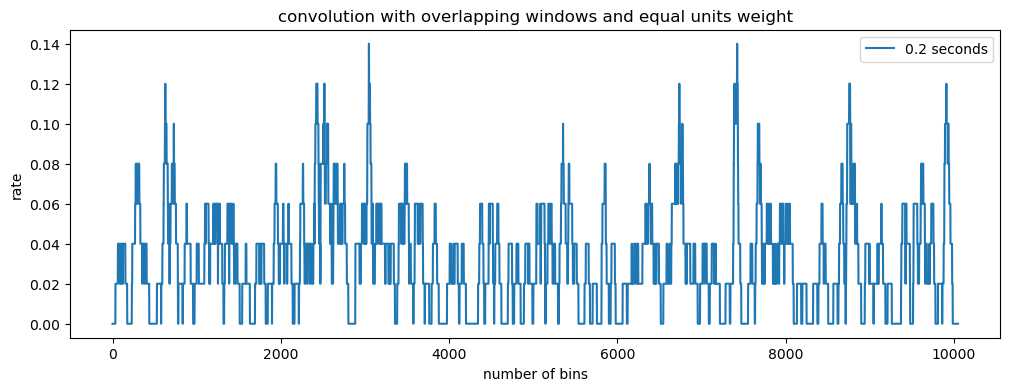

In [810]:
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)

for s in [0.2]:
    conv_size = len(np.arange(0,10,s))
    print(conv_size)
    window = np.ones(conv_size) / conv_size
    print(window)
    convolution_arr = SDA_Ex1_codeToSubmit.MyConv(spk_train,window)
    ax.plot(convolution_arr, label=str(s)+' seconds')
    ax.set_xlabel('number of bins')
    ax.set_ylabel('rate')
    ax.set_title('convolution with overlapping windows and equal units weight')
    ax.legend()



4
10
20
50


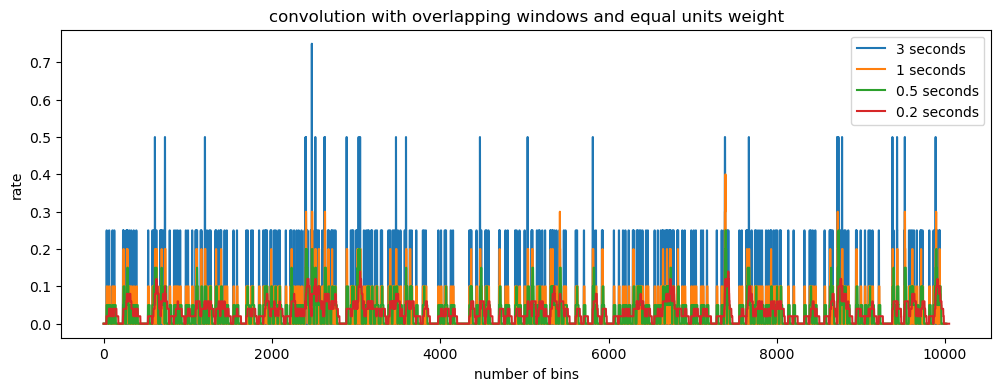

In [779]:
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)

for s in bin_sizes[::-1]:
    conv_size = len(np.arange(0,10,s))
    window = np.ones(conv_size) / conv_size
    print(len(window))
    convolution_arr = MyConv(spk_train,window)
    ax.plot(convolution_arr, label=str(s)+' seconds')
    ax.set_xlabel('number of bins')
    ax.set_ylabel('rate')
    ax.set_title('convolution with overlapping windows and equal units weight')
    ax.legend()



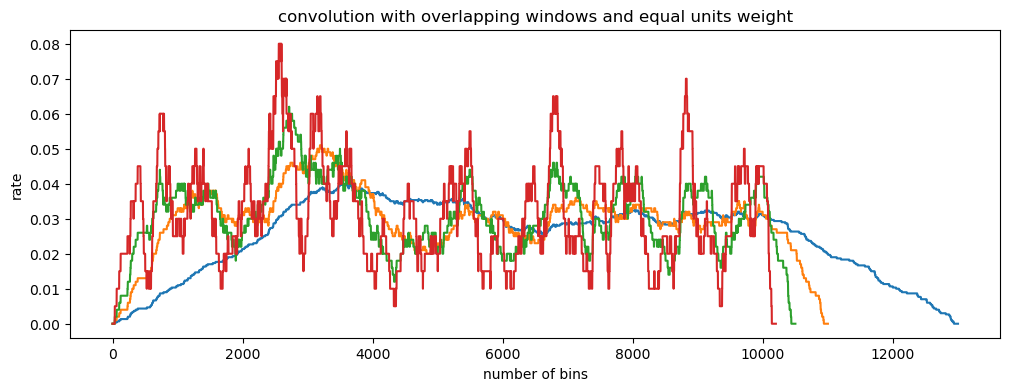

In [20]:
win1 = np.ones(3000) 
win1 = win1 / 3000

win2 = np.ones(1000) 
win2 = win2 / 1000

win3 = np.ones(500) 
win3 = win3 / 500

win4 = np.ones(200) 
win4 = win4 / 200

wins = [win1,win2,win3,win4]
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)

for w in wins:
    convolution_arr = MyConv(spk_train,w)
    ax.plot(convolution_arr)
    ax.set_xlabel('number of bins')
    ax.set_ylabel('rate')
    ax.set_title('convolution with overlapping windows and equal units weight')



[0.27892789 0.28071426 0.28250755 0.28430775 0.28611484 0.28792881
 0.28974965 0.29157734 0.29341186 0.2952532  0.29710134 0.29895626
 0.30081795 0.3026864  0.30456157 0.30644346 0.30833205 0.31022731
 0.31212922 0.31403777 0.31595294 0.3178747  0.31980303 0.32173791
 0.32367932 0.32562724 0.32758163 0.32954248 0.33150977 0.33348346
 0.33546354 0.33744998 0.33944274 0.34144181 0.34344716 0.34545876
 0.34747658 0.3495006  0.35153078 0.3535671  0.35560952 0.35765802
 0.35971256 0.36177312 0.36383966 0.36591215 0.36799056 0.37007485
 0.37216499 0.37426095 0.37636269 0.37847018 0.38058338 0.38270225
 0.38482677 0.38695689 0.38909257 0.39123378 0.39338048 0.39553263
 0.39769019 0.39985312 0.40202138 0.40419494 0.40637374 0.40855775
 0.41074693 0.41294123 0.41514061 0.41734503 0.41955443 0.42176879
 0.42398805 0.42621217 0.4284411  0.4306748  0.43291321 0.4351563
 0.43740401 0.4396563  0.44191311 0.4441744  0.44644012 0.44871022
 0.45098464 0.45326334 0.45554626 0.45783336 0.46012458 0.46241

Text(0.5, 1.0, 'convolution with Gaussian windows')

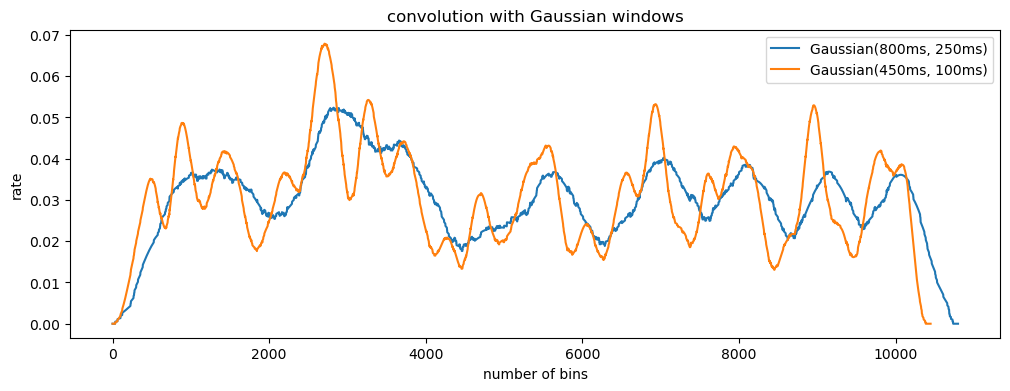

In [21]:
bin_sizes = [800, 450]
sdts = [250, 100]

fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)

for s,v in zip(bin_sizes,sdts):
    window = sig.gaussian(s, v)
    window = window/sum(window)
    convolution_arr = MyConv(spk_train,window)
    ax.plot(convolution_arr, label='Gaussian('+str(s)+'ms, '+str(v)+'ms)')
# fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
# window1 = sig.windows.gaussian(800, std=250)
# window2 = sig.windows.gaussian(450, std=100)
# convolution_arr1 = MyConv(spk_train,window1)
# convolution_arr2 = MyConv(spk_train,window2)
# ax.plot(convolution_arr1, label='Gaussian(0.8s, 0.25s)')
# ax.plot(convolution_arr2, label='Gaussian(0.45s, 0.1s)')
ax.legend()
ax.set_xlabel('number of bins')
ax.set_ylabel('rate')
ax.set_title('convolution with Gaussian windows')

## 4. Stochastic Point Process

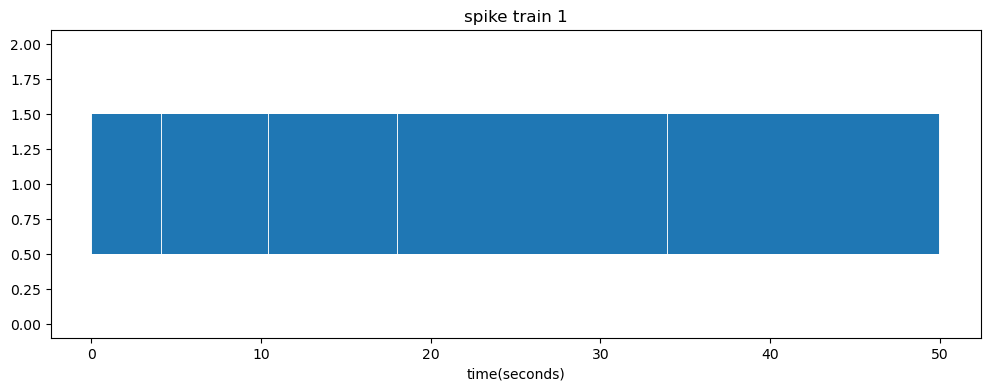

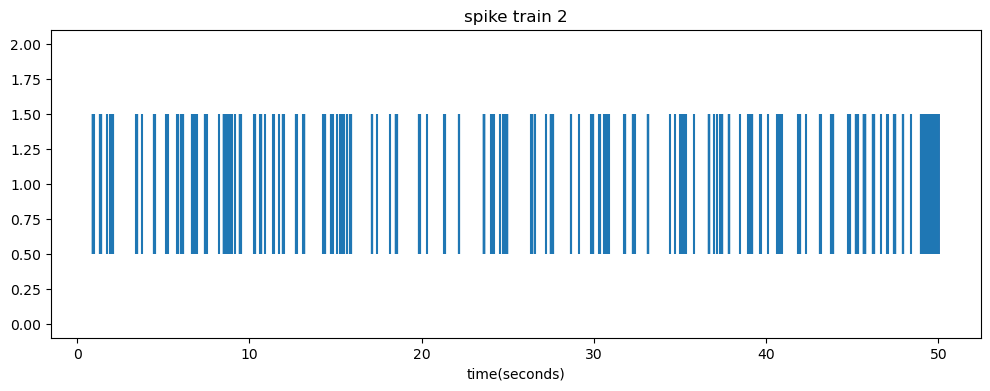

In [781]:

spk1 = pd.read_csv('spk1.csv', header=None)
spk2 = pd.read_csv('spk2.csv', header=None)

spk1_list = []
with open('spk1.csv') as f:
    for row in f:
        spk1_list.append(float(row.split()[0]))
        
spk2_list = []
with open('spk2.csv') as f:
    for row in f:
        spk2_list.append(float(row.split()[0]))

fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
ax.eventplot(spk1_list)
__ = ax.set_xlabel(f'time(seconds)')
__ = ax.set_title('spike train 1')


fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=1)
ax.eventplot(spk2_list)
__ = ax.set_xlabel(f'time(seconds)')
__ = ax.set_title('spike train 2')


In [787]:
# we are looking on lists of spikes time in 50s
# input: list of times of spikes as seconds, size of window = deltaT as ms
# output: FF, CV

def compute_ff_cv(spk_times, window_size):
    # converting the spk times to train of size 50,000
    spk_train = np.zeros(50000)
    for s in spk_times:
        spk_train[round(s*1000)] = 1
     
    
    # for calculating the FF 
    # we want to calculate the mean and var spike count over the window t
    
    ff = 0
    list_spk_count = []
    for t in np.arange(0, 50000, window_size):
        list_spk_count.append(sum(spk_train[t:t+window_size]))
    
    mean_spk_count = np.mean(list_spk_count)
    var_spk_count = np.var(list_spk_count)                          
    ff = var_spk_count / mean_spk_count
    
    # for calculating the CV
    # we want to calculate the mean and std of the inter spike interval
    cv = 0
    spk_intervals = np.diff(spk_times).reshape(-1)
    mean_isi = np.mean(spk_intervals)
    std_isi = np.std(spk_intervals)
    cv = std_isi / mean_isi
    
    return ff,cv

In [809]:
ff1_1,cv1_1 = SDA_Ex1_codeToSubmit.compute_ff_cv(spk1_list, 100)
ff1_2,cv1_2 = SDA_Ex1_codeToSubmit.compute_ff_cv(spk1_list, 500)
ff1_3,cv1_3 = SDA_Ex1_codeToSubmit.compute_ff_cv(spk1_list, 1000)

ff2_1,cv2_1 = SDA_Ex1_codeToSubmit.compute_ff_cv(spk2_list, 100)
ff2_2,cv2_2 = SDA_Ex1_codeToSubmit.compute_ff_cv(spk2_list, 500)
ff2_3,cv2_3 = SDA_Ex1_codeToSubmit.compute_ff_cv(spk2_list, 1000)


print('spk1 with window of 100ms\n ff1_1 = ',ff1_1,' cv1_1 = ',cv1_1)
print('\n spk1 with window of 500ms\n ff1_2 = ',ff1_2,' cv1_2 = ',cv1_2)
print('\n spk1 with window of 1000ms\n ff1_3 = ',ff1_3,' cv1_3 = ',cv1_3)
print('\n spk2 with window of 100ms\n ff2_1 = ',ff2_1,' cv2_1 = ',cv2_1)
print('\n spk2 with window of 500ms\n ff2_2 = ',ff2_2,' cv2_2 = ',cv2_2)
print('\n spk2 with window of 1000ms\n ff2_3 = ',ff2_3,' cv2_3 = ',cv2_3)


spk1 with window of 100ms
 ff1_1 =  0.4989939879759518  cv1_1 =  0.12601541148759743

 spk1 with window of 500ms
 ff1_2 =  0.11420841683366735  cv1_2 =  0.12601541148759743

 spk1 with window of 1000ms
 ff1_3 =  0.058076152304609205  cv1_3 =  0.12601541148759743

 spk2 with window of 100ms
 ff2_1 =  63.692829467939994  cv2_1 =  4.21551274934503

 spk2 with window of 500ms
 ff2_2 =  306.09443383356063  cv2_2 =  4.21551274934503

 spk2 with window of 1000ms
 ff2_3 =  608.6663574351977  cv2_3 =  4.21551274934503


In [789]:
ff,cv = compute_ff_cv(spk2_list, 1)
ff,cv

(0.9706799999999998, 4.21551274934503)